# Problem statement:

This dataset has 61 columns and 208 rows. Our task is to analyze the dataset and predict whether the object detected by sonar is Rock or Mines by developing a supervised machine learning model.

In [48]:
# Import all the required liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
#Load Sonar Data Set
df = pd.read_csv("C:/Users/acer/Desktop/Data Science/Data Sets/sonar/sonar.csv")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,object
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Analyzing the data:

Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the  data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [50]:
#check the shape of data
df.shape

(208, 61)

In [51]:
#Check if any missing value present in data
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
57        0
58        0
59        0
60        0
object    0
Length: 61, dtype: int64

In [52]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# Data Visualization: 

Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

1        AxesSubplot(0.125,0.821923;0.110714x0.0580769)
2     AxesSubplot(0.257857,0.821923;0.110714x0.0580769)
3     AxesSubplot(0.390714,0.821923;0.110714x0.0580769)
4     AxesSubplot(0.523571,0.821923;0.110714x0.0580769)
5     AxesSubplot(0.656429,0.821923;0.110714x0.0580769)
6     AxesSubplot(0.789286,0.821923;0.110714x0.0580769)
7        AxesSubplot(0.125,0.752231;0.110714x0.0580769)
8     AxesSubplot(0.257857,0.752231;0.110714x0.0580769)
9     AxesSubplot(0.390714,0.752231;0.110714x0.0580769)
10    AxesSubplot(0.523571,0.752231;0.110714x0.0580769)
11    AxesSubplot(0.656429,0.752231;0.110714x0.0580769)
12    AxesSubplot(0.789286,0.752231;0.110714x0.0580769)
13       AxesSubplot(0.125,0.682538;0.110714x0.0580769)
14    AxesSubplot(0.257857,0.682538;0.110714x0.0580769)
15    AxesSubplot(0.390714,0.682538;0.110714x0.0580769)
16    AxesSubplot(0.523571,0.682538;0.110714x0.0580769)
17    AxesSubplot(0.656429,0.682538;0.110714x0.0580769)
18    AxesSubplot(0.789286,0.682538;0.110714x0.0

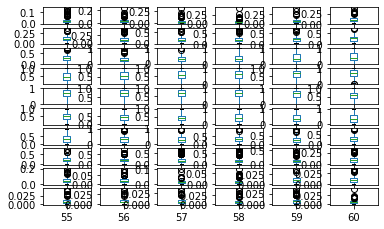

In [53]:
#check outliers
df.plot(kind='box',subplots=True,layout=(11,6))

In [54]:
#Get the count of numbers of Mines(M) and Rocks(R)
df['object'].value_counts()

M    111
R     97
Name: object, dtype: int64

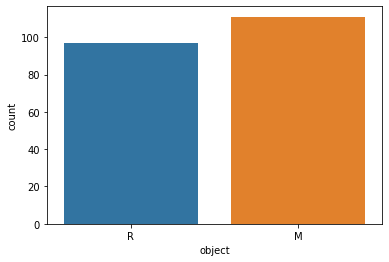

In [55]:
#Visualize the count
sns.countplot(df['object'],label='count')

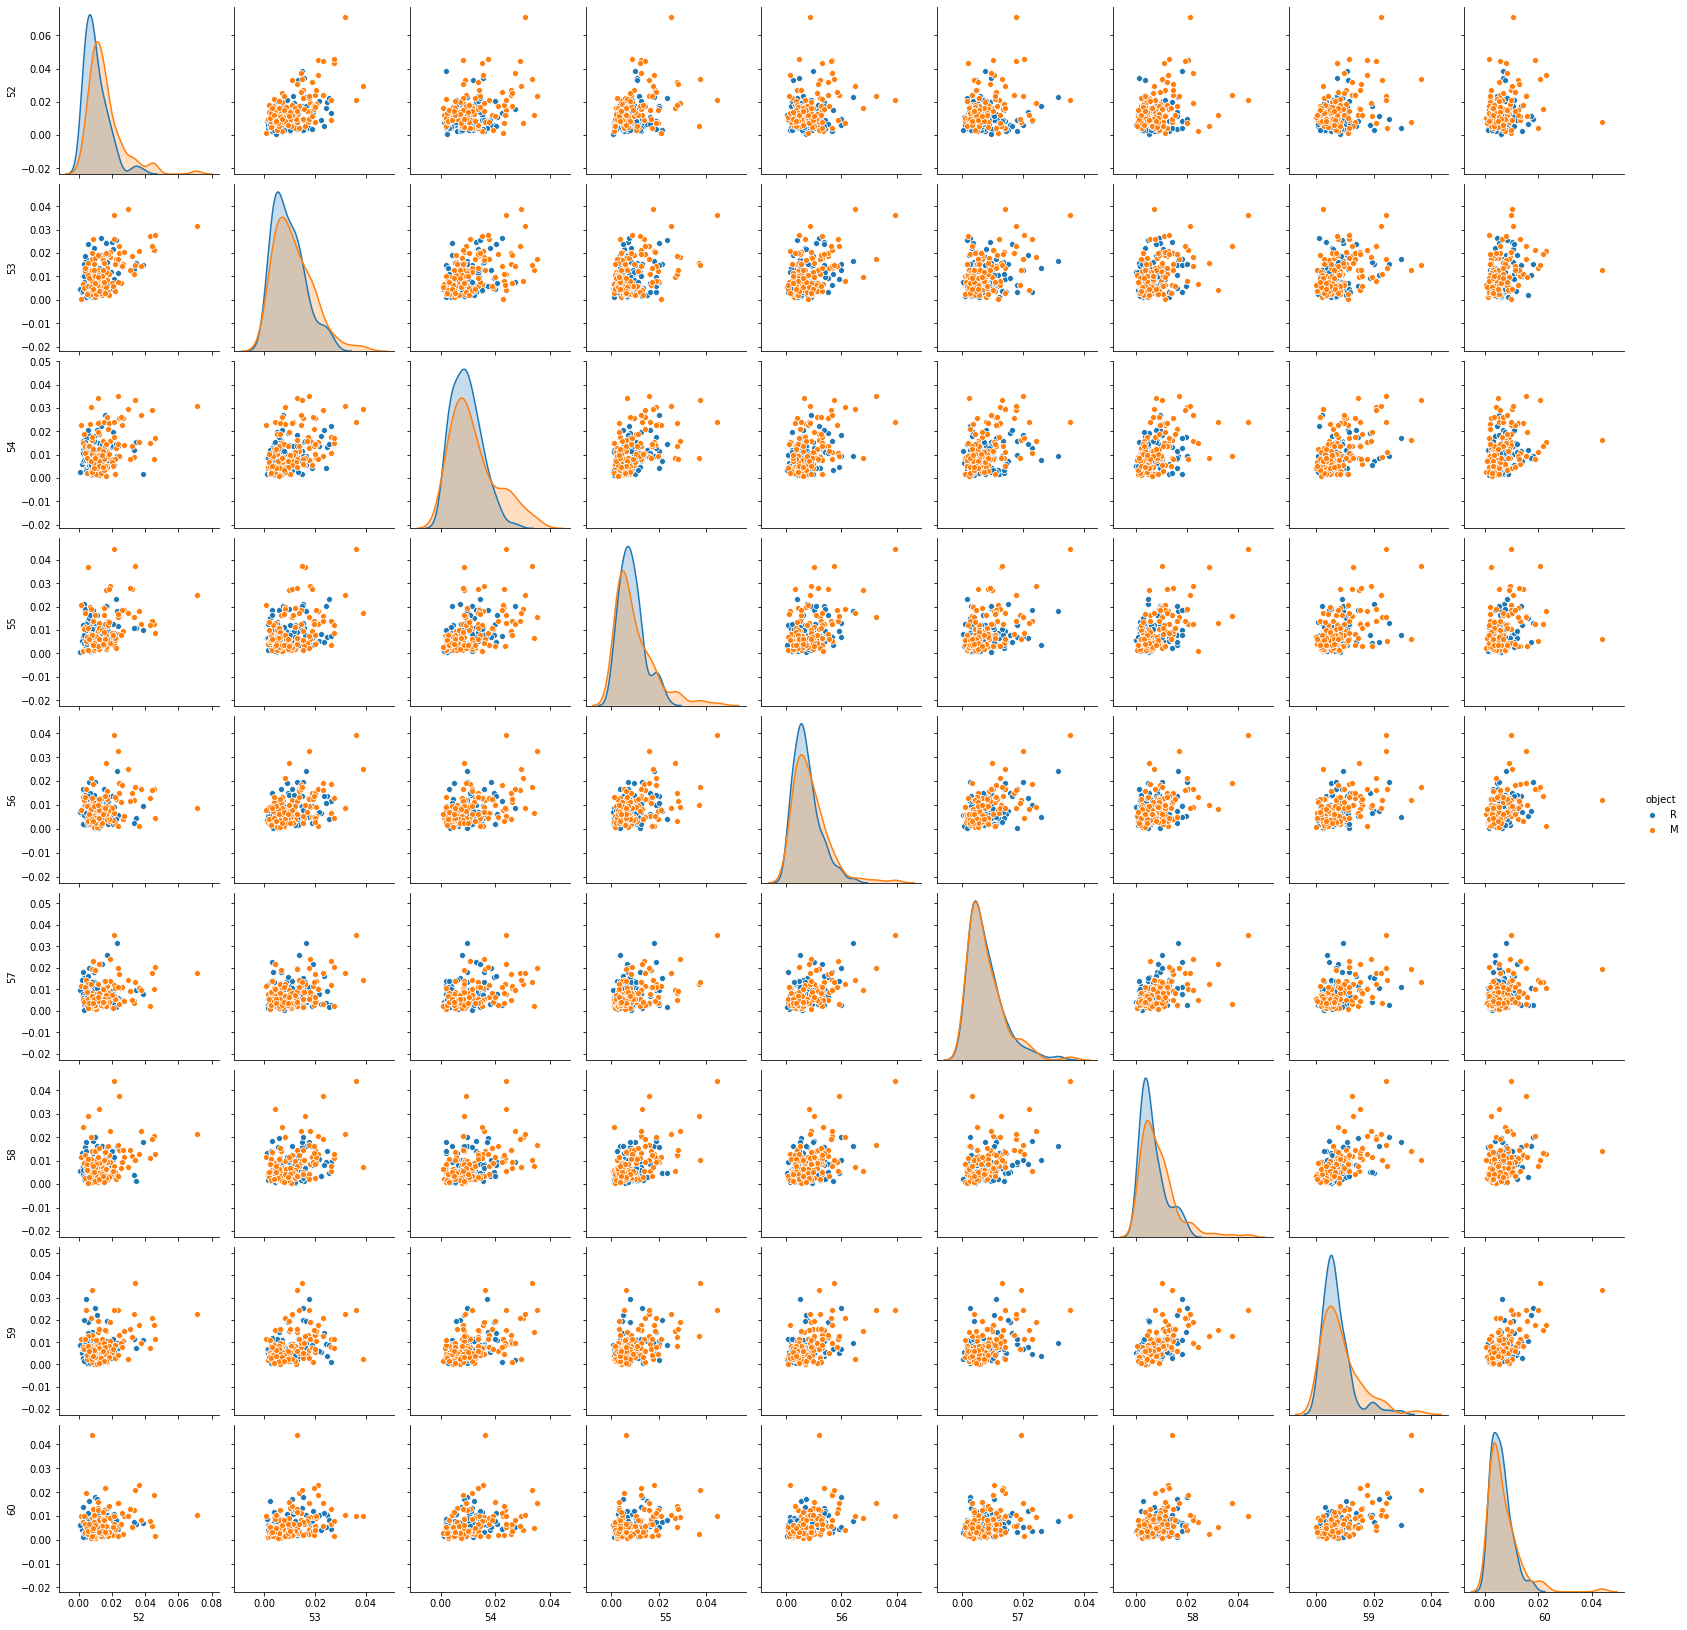

In [56]:
#create pairplot
sns.pairplot(df.iloc[:,-10:] , hue = 'object')

# Feature Engineering:

Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations.
Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [57]:
#look at the data types to find which columns need to be encoded
df.dtypes

1         float64
2         float64
3         float64
4         float64
5         float64
           ...   
57        float64
58        float64
59        float64
60        float64
object     object
Length: 61, dtype: object

In [58]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.iloc[:,-1] = label.fit_transform(df.iloc[:,-1].values)

df.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: object, Length: 208, dtype: int32

In [59]:
#new data
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,object
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [60]:
#get the correlation of columns
df.iloc[:,-10:].corr()

,52,53,54,55,56,57,58,59,60,object
52,1.000000,0.540414,0.343190,0.337581,0.203121,0.191264,0.309673,0.298711,0.195379,-0.288651
53,0.540414,1.000000,0.412337,0.315656,0.421588,0.308197,0.370764,0.346095,0.280780,-0.141871
54,0.343190,0.412337,1.000000,0.455059,0.397378,0.361443,0.404117,0.447118,0.283471,-0.182687
55,0.337581,0.315656,0.455059,1.000000,0.429948,0.387204,0.503465,0.453658,0.264399,-0.095639
56,0.203121,0.421588,0.397378,0.429948,1.000000,0.515154,0.463659,0.430804,0.349449,-0.129341
57,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
58,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
59,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
60,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055
object,-0.288651,-0.141871,-0.182687,-0.095639,-0.129341,-0.000933,-0.184191,-0.130826,-0.090055,1.000000


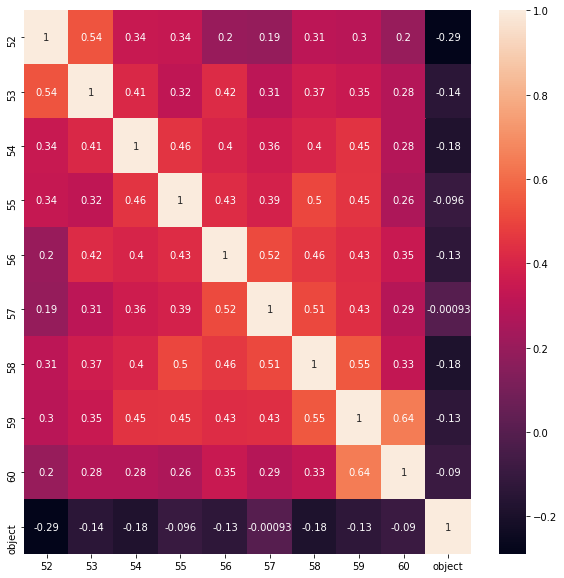

In [61]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,-10:].corr() , annot = True)

# Model Selection:

There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the object which can either be 0 or 1 ( Rock or mine) and we want to identify a relation between our output (object) and remaining independent features . This scenario is a classic example of Classification (classify whether object is Rock or Mine ).

We are provided with 208 rows of the labeled dataset tagged with the output column “object” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree


# Identifying features:

Here we are dividing our data into a dependent feature that is object as df_y and independent features as df_x.

In [62]:
#split the dataset into independent (x) and dependent (y) data sets
x = df.iloc[:,:-1]
y = df['object']

## Splitting Data: 

 we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.30 creates a test data set with 30% of the data we have and the remaining 70% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [69]:
# split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .30 , random_state = 30)


In [70]:

model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuaracy score of 0.7936507936507936
[[27  8]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.74      0.82      0.78        28

    accuracy                           0.79        63
   macro avg       0.79      0.80      0.79        63
weighted avg       0.80      0.79      0.79        63



accuaracy score of 0.873015873015873
[[33  2]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.92      0.79      0.85        28

    accuracy                           0.87        63
   macro avg       0.88      0.86      0.87        63
weighted avg       0.88      0.87      0.87        63



accuaracy score of 0.7142857142857143
[[26  9]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.68      0.68      0.68        28

    accu

## we can observe that all algorithem worked very well.

Accuracy score of all algorithems are as given:-

Accuracy score of Logistic Regression is 79%

Accuracy score of SVC is 87%

Accuracy score of Decision Tree Classifier is 71%

Accuracy score of K Neighbors Classifier is 74%


Hence we can say that out all algorithems SVC is best for this problem till now.


# Save the model using Pickle

In [66]:
svc = SVC()

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print('accuaracy score of SVC()',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('\n')

accuaracy score of SVC() 0.873015873015873
[[31  4]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.86      0.86      0.86        28

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63





In [67]:
# Save the model using pickle
import pickle

filename = "picklesvcfile.pkl"
pickle.dump(svc, open(filename, 'wb'))


In [68]:
# predict using the saved model by pickle


loaded_model = pickle.load(open("picklesvcfile.pkl", 'rb'))

loaded_model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

# Conclusion:

we achieved highest accuracy score of 87% by using Support Vectore Clasifier which is good for any machine learning prediction model particularly for a classification regression problem. Finally! we successfully created a classification Machine Learning prediction model using Python and its powerful libraries which predicts whether a given object is Rock or Mine.